# Linear Regression (Regression) for Gold Price Prediction

Training School: Kiddee Lab

## Installing yahoo finance library

In [2]:
# !pip install yfinance

## Importing Libraries

In [3]:
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import yfinance as yf
import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## How to use Yahoo Finance Python?

https://finance.yahoo.com/lookup/

### Using Ticker Function

In [4]:
Get_Facebook_Information    = yf.Ticker("META")
Get_Google_Information      = yf.Ticker("GOOGL")
Get_Amazon_Information      = yf.Ticker("AMZN")

In [12]:
print(Get_Facebook_Information.info)
print(Get_Google_Information.info)
print(Get_Amazon_Information.info)

In [5]:
# display Company Sector
print("Information of Facebook")
print("Company Sector : ", Get_Facebook_Information.info['sector'])

# display Price Earnings Ratio
print("Price Earnings Ratio : ", Get_Facebook_Information.info['trailingPE'])
 
# display Company Beta
print("Company Beta : ", Get_Facebook_Information.info['beta'])

Information of Facebook
Company Sector :  Communication Services
Price Earnings Ratio :  29.883211
Company Beta :  1.198099


In [6]:
# get all key value pairs that are available
for key, value in Get_Facebook_Information.info.items():
    print(key, ":", value)

address1 : 1601 Willow Road
city : Menlo Park
state : CA
zip : 94025
country : United States
phone : 650 543 4800
website : https://investor.fb.com
industry : Internet Content & Information
industryDisp : Internet Content & Information
sector : Communication Services
longBusinessSummary : Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, communities, and businesses across platforms and devices through text, audio, and video calls; and

In [7]:
print("Google Stock History Up to the latest update:")
print(Get_Google_Information.history(period="max"))

Google Stock History Up to the latest update:
                                 Open        High         Low       Close  \
Date                                                                        
2004-08-19 00:00:00-04:00    2.502503    2.604104    2.401401    2.511011   
2004-08-20 00:00:00-04:00    2.527778    2.729730    2.515015    2.710460   
2004-08-23 00:00:00-04:00    2.771522    2.839840    2.728979    2.737738   
2004-08-24 00:00:00-04:00    2.783784    2.792793    2.591842    2.624374   
2004-08-25 00:00:00-04:00    2.626627    2.702703    2.599600    2.652653   
...                               ...         ...         ...         ...   
2023-05-15 00:00:00-04:00  116.110001  118.480003  116.010002  116.510002   
2023-05-16 00:00:00-04:00  116.489998  120.750000  116.430000  119.510002   
2023-05-17 00:00:00-04:00  119.610001  121.669998  118.889999  120.839996   
2023-05-18 00:00:00-04:00  120.949997  123.309998  120.830002  122.830002   
2023-05-19 00:00:00-04:00  123

Available Time Period 

***1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo, 5y***

In [13]:
print("Google Stock history starting from 5 months ago:")
print(Get_Google_Information.history(period="5mo"))

Google Stock history starting from 5 months ago:
                                 Open        High         Low       Close  \
Date                                                                        
2022-12-20 00:00:00-05:00   88.110001   89.180000   87.440002   89.019997   
2022-12-21 00:00:00-05:00   89.080002   90.220001   88.320000   89.580002   
2022-12-22 00:00:00-05:00   88.160004   88.540001   86.320000   87.760002   
2022-12-23 00:00:00-05:00   87.110001   89.550003   87.070000   89.230003   
2022-12-27 00:00:00-05:00   88.800003   88.940002   87.010002   87.389999   
...                               ...         ...         ...         ...   
2023-05-15 00:00:00-04:00  116.110001  118.480003  116.010002  116.510002   
2023-05-16 00:00:00-04:00  116.489998  120.750000  116.430000  119.510002   
2023-05-17 00:00:00-04:00  119.610001  121.669998  118.889999  120.839996   
2023-05-18 00:00:00-04:00  120.949997  123.309998  120.830002  122.830002   
2023-05-19 00:00:00-04:00  

In [14]:
# startDate , as per our convenience we can modify
startDate = datetime.datetime(2006, 1, 1)
 
# endDate , as per our convenience we can modify
endDate = datetime.datetime(2011, 1, 1)

Data_frame = Get_Google_Information.history(start=startDate, end=endDate)
# pass the parameters as the taken dates for start and end
print("Columns of Google Stock Dataset",Data_frame.columns)

# print(Data_frame[0])       #This will give you error, we cannot index like this from ticker funciton 
print(Data_frame[:2])
print(Data_frame[-2:])

Columns of Google Stock Dataset Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
                                Open       High        Low      Close  \
Date                                                                    
2006-01-03 00:00:00-05:00  10.573574  10.902653  10.465966  10.891642   
2006-01-04 00:00:00-05:00  11.108609  11.235235  11.004755  11.142142   

                              Volume  Dividends  Stock Splits  
Date                                                           
2006-01-03 00:00:00-05:00  524323152        0.0           0.0  
2006-01-04 00:00:00-05:00  610844544        0.0           0.0  
                                Open       High        Low      Close  \
Date                                                                    
2010-12-30 00:00:00-05:00  14.964965  15.048298  14.949700  14.986486   
2010-12-31 00:00:00-05:00  14.933433  14.975475  14.815566  14.864114   

                             Vo

<Axes: title={'center': "APPLE's Stock Price in5Years"}, xlabel='Date'>

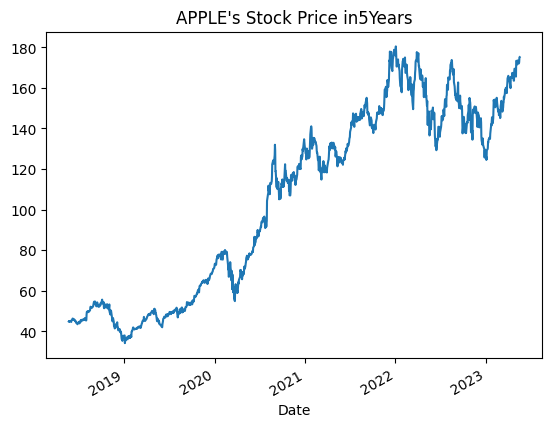

In [15]:
Get_Apple_Information = yf.Ticker("AAPL")
num_year = 5
Data_frame = Get_Apple_Information.history(period= str(num_year)+"y")
Data_frame['Close'].plot(title="APPLE's Stock Price in"+ str(num_year) + "Years")

In [16]:
print(Get_Apple_Information.info['currency'])

USD


In [17]:
print("Major Holders of APPLE Stock")
print(Get_Apple_Information.major_holders)

Major Holders of APPLE Stock
        0                                      1
0   0.07%        % of Shares Held by All Insider
1  61.23%       % of Shares Held by Institutions
2  61.27%        % of Float Held by Institutions
3    5743  Number of Institutions Holding Shares


In [18]:
print("Institutions Holders of APPLE Stock")
Get_Apple_Information.institutional_holders

Institutions Holders of APPLE Stock


,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",1309785362,2023-03-30,0.0833,229422008804
1,Blackrock Inc.,1035008939,2023-03-30,0.0658,181292169545
2,"Berkshire Hathaway, Inc",915560382,2023-03-30,0.0582,160369559864
3,State Street Corporation,576281774,2023-03-30,0.0366,100941517644
4,"FMR, LLC",311437576,2023-03-30,0.0198,54551406952
5,"Geode Capital Management, LLC",285171112,2023-03-30,0.0181,49950573022
6,Price (T.Rowe) Associates Inc,234017381,2023-03-30,0.0149,40990485312
7,Morgan Stanley,200615893,2023-03-30,0.0128,35139880552
8,Northern Trust Corporation,173130542,2023-03-30,0.0110,30325546370
9,Norges Bank Investment Management,167374278,2022-12-30,0.0106,29317279147


In [20]:
print("The incoming events of APPLE Company")
Get_Apple_Information.calendar 

The incoming events of APPLE Company


### Direct download (not using ticker this time)

In [21]:
Data_frame = yf.download("AAPL", "2022-01-01", "2022-11-30")
print(Data_frame[:1])

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.43428   

               Volume  
Date                   
2022-01-03  104487900  


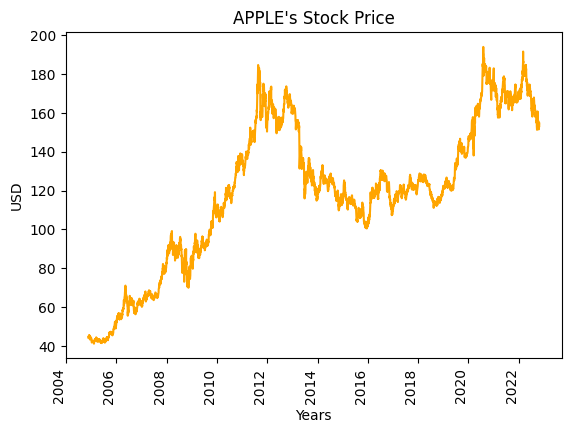

In [63]:
Data_frame['Close'].plot(color = "orange", xlabel = "Years", ylabel = "USD", title="APPLE's Stock Price")
plt.xticks(rotation='vertical')
plt.show()

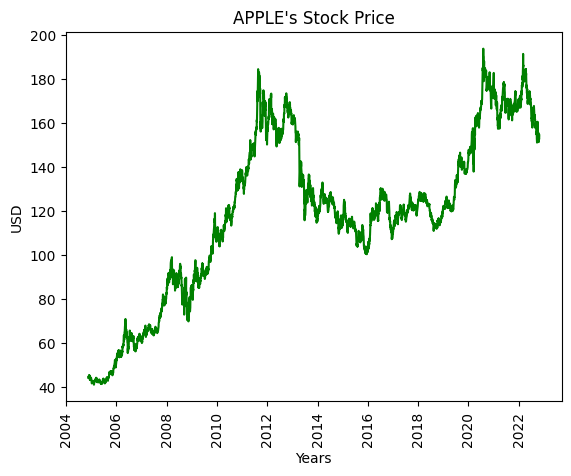

In [64]:
plt.plot(Data_frame['Close'], color = "green")
plt.xticks(rotation='vertical')
plt.xlabel("Years")
plt.ylabel("USD")
plt.title("APPLE's Stock Price")
plt.show()

In [24]:
# Direct download (not using ticker this time)
Data_frame_Apple = yf.download("AAPL", "2022-01-01", "2022-11-30")
Data_frame_Tesla = yf.download("TSLA", "2022-01-01", "2022-11-30")
Data_frame_Intel = yf.download("INTC", "2022-01-01", "2022-11-30")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


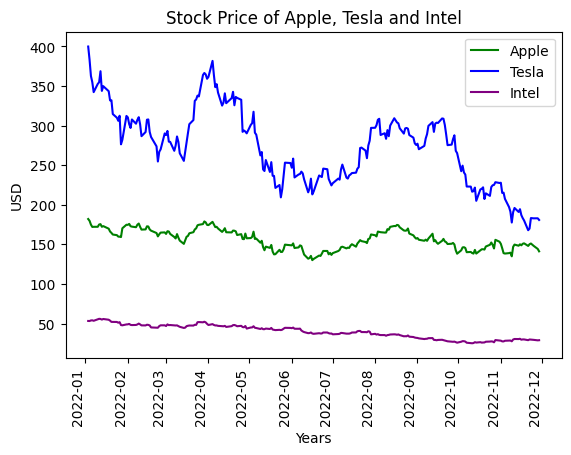

In [61]:
Data_frame_Apple['Close'].plot(label = "Apple",color = "green", xlabel = "Years", 
                               ylabel = "USD")
Data_frame_Tesla['Close'].plot(label = "Tesla", color = "blue", xlabel = "Years", 
                               ylabel = "USD")
Data_frame_Intel['Close'].plot(label = "Intel",color = "purple", xlabel = "Years", 
                               ylabel = "USD")

plt.legend()
plt.title("Stock Price of Apple, Tesla and Intel")
plt.xticks(rotation='vertical')
plt.show()

### Downloading stock data of multiple company to one dataframe

In [26]:
Combine_Data_frame = yf.download("AMZN AAPL GOOG", start="2017-01-01",
                    end="2022-12-31", group_by='tickers')
Combine_Data_frame.head()

[*********************100%***********************]  3 of 3 completed


AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-01-03  28.950001  29.082500  28.690001  29.037500  27.095846  115127600   
2017-01-04  28.962500  29.127501  28.937500  29.004999  27.065514   84472400   
2017-01-05  28.980000  29.215000  28.952499  29.152500  27.203159   88774400   
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.506428  127007600   
2017-01-09  29.487499  29.857500  29.485001  29.747499  27.758373  134247600   

                 AMZN                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-01-03  37.896000  37.938000  37.384998  37.683498  37.683498   70422000   
2017-01-04  37.919498  37.984001  37.709999  37.859001  37.859001   50210000   
2017-01-05  38.077499  39.119999  38.013000  39.022499  39.022499  116602000   
2017-01-06  39.118000  39.972000  38.924000  39.799500  39.799500  119724000   
2017-01-09  39.900002  40.088501  39.588501  39.846001  39.846001   68922000   

                 GOOG                                                        
                 Open       High        Low      Close  Adj Close    Volume  
Date                                                                         
2017-01-03  38.940498  39.481499  38.790001  39.306999  39.306999  33146000  
2017-01-04  39.417999  39.567001  39.158001  39.345001  39.345001  21460000  
2017-01-05  39.304001  39.723999  39.250999  39.701000  39.701000  26704000  
2017-01-06  39.763000  40.395000  39.610199  40.307499  40.307499  32804000  
2017-01-09  40.320000  40.498299  40.141499  40.332500  40.332500  25492000

In [27]:
print(Combine_Data_frame.columns)

MultiIndex([('AAPL',      'Open'),
            ('AAPL',      'High'),
            ('AAPL',       'Low'),
            ('AAPL',     'Close'),
            ('AAPL', 'Adj Close'),
            ('AAPL',    'Volume'),
            ('AMZN',      'Open'),
            ('AMZN',      'High'),
            ('AMZN',       'Low'),
            ('AMZN',     'Close'),
            ('AMZN', 'Adj Close'),
            ('AMZN',    'Volume'),
            ('GOOG',      'Open'),
            ('GOOG',      'High'),
            ('GOOG',       'Low'),
            ('GOOG',     'Close'),
            ('GOOG', 'Adj Close'),
            ('GOOG',    'Volume')],
           )


In [28]:
print("Level 1 columns:\n",Combine_Data_frame.columns.get_level_values(0))
print("\n")
print("level 2 columns:\n",Combine_Data_frame.columns.get_level_values(1))

Level 1 columns:
 Index(['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AMZN', 'AMZN', 'AMZN',
       'AMZN', 'AMZN', 'AMZN', 'GOOG', 'GOOG', 'GOOG', 'GOOG', 'GOOG', 'GOOG'],
      dtype='object')


level 2 columns:
 Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume'],
      dtype='object')


In [29]:
Combine_Data_frame['GOOG']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [30]:
Combine_Data_frame['GOOG']["Close"]

Date
2017-01-03    39.306999
2017-01-04    39.345001
2017-01-05    39.701000
2017-01-06    40.307499
2017-01-09    40.332500
                ...    
2022-12-23    89.809998
2022-12-27    87.930000
2022-12-28    86.459999
2022-12-29    88.949997
2022-12-30    88.730003
Name: Close, Length: 1510, dtype: float64

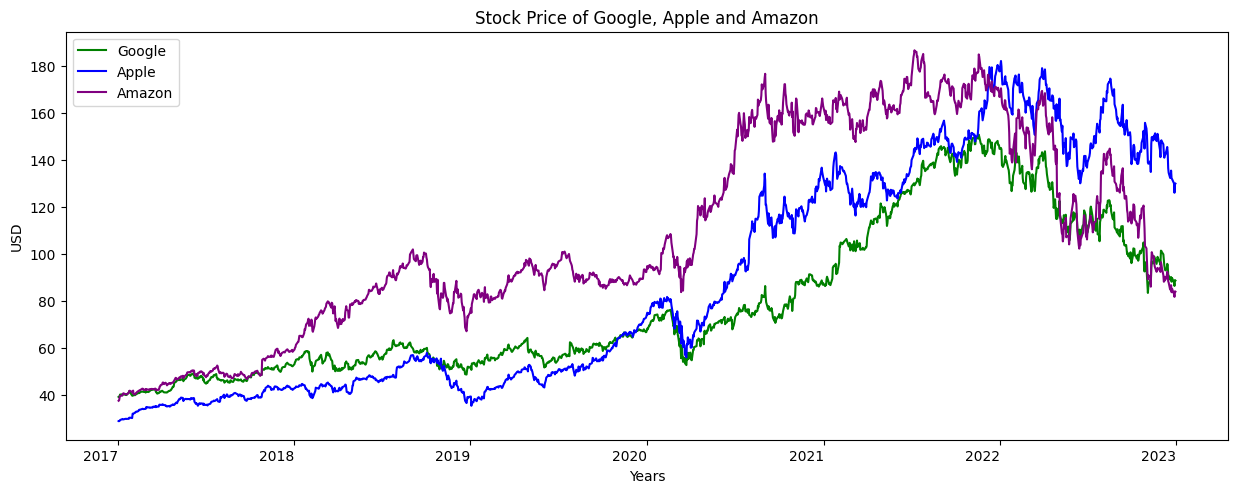

In [31]:
plt.figure(figsize=(15, 6))
Combine_Data_frame['GOOG']['Close'].plot(label = "Google",color = "green", xlabel = "Years", 
                               ylabel = "USD")
Combine_Data_frame['AAPL']['Close'].plot(label = "Apple", color = "blue", xlabel = "Years", 
                               ylabel = "USD")
Combine_Data_frame['AMZN']['Close'].plot(label = "Amazon",color = "purple", xlabel = "Years", 
                               ylabel = "USD")

plt.legend()
plt.title("Stock Price of Google, Apple and Amazon")
plt.xticks(rotation='horizontal')
plt.show()

Advantages of using one data frame is that you can use for loop to plot for companies you have in your data frame.

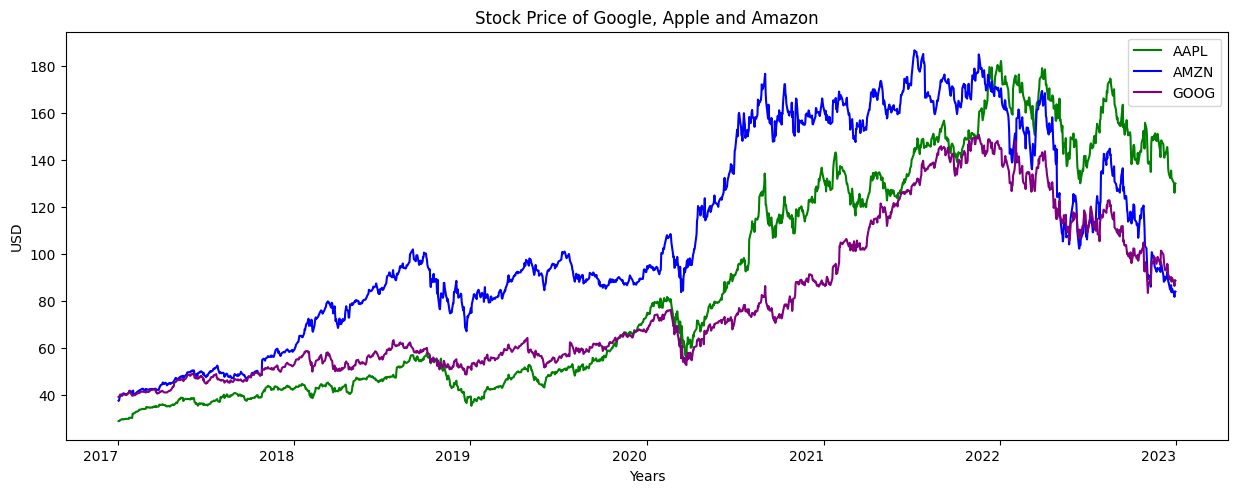

In [32]:
Company_names = Combine_Data_frame.columns.get_level_values(0).unique().values
# print(Company_names)
color = ["green", "blue", "purple"]

plt.figure(figsize=(15, 6))

for index_color, name in enumerate(Company_names):
  Combine_Data_frame[name]['Close'].plot(label = name,  color = color[index_color], xlabel = "Years", ylabel = "USD")

plt.legend()
plt.title("Stock Price of Google, Apple and Amazon")
plt.xticks(rotation='horizontal')
plt.show()

## Loading Gold Price Dataset

### Dataset Descritions

These gold prices are prices of Gold exchange-traded product in USD.

Gold exchange-traded products are exchange-traded funds (ETF) , closed-end funds and exchange-traded notes that are used to own gold as an investment.

In [33]:
Data_frame = yf.download("GLD", "2000-01-01", "2022-10-31")


[*********************100%***********************]  1 of 1 completed


## Data Exploration

In [34]:
print(Data_frame.head())
print(Data_frame[-5:])

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001  11996000
2004-11-23  44.880001  44.919998  44.720001  44.750000  44.750000   3169200
2004-11-24  44.930000  45.049999  44.790001  45.049999  45.049999   6105100
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-24  153.449997  154.059998  153.059998  153.649994  153.649994   
2022-10-25  153.960007  154.789993  153.830002  154.000000  154.000000   
2022-10-26  154.779999  155.729996  154.779999  154.979996  154.979996   
2022-10-27  154.710007  155.089996  154.220001  154.740005  154.740005   
2022-10-28  152.960007  

Need 2 dimension data

In [98]:
Data_frame_closed_price = Data_frame["Close"]  # 1 Dimension
print("Shape of Data Frame",Data_frame_closed_price.shape)
print(Data_frame_closed_price.head())


Data_frame_closed_price_2D = Data_frame[["Close"]]   # 2 Dimensions
print("Shape of Data Frame", Data_frame_closed_price_2D.shape)
print(Data_frame_closed_price_2D.head())

Shape of Data Frame (4518,)
Date
2004-11-18    44.380001
2004-11-19    44.779999
2004-11-22    44.950001
2004-11-23    44.750000
2004-11-24    45.049999
Name: Close, dtype: float64
Shape of Data Frame (4518, 1)
                Close
Date                 
2004-11-18  44.380001
2004-11-19  44.779999
2004-11-22  44.950001
2004-11-23  44.750000
2004-11-24  45.049999


In [66]:
Data_frame_closed_price_2D = Data_frame[["Close"]] 
print("Total rows:",Data_frame_closed_price_2D.shape[0], "Total Column:", Data_frame_closed_price_2D.shape[1])
print("\n")
print("Shape of Data Frame:", Data_frame_closed_price_2D.shape)
print(Data_frame_closed_price_2D.head())

Total rows: 4518 Total Column: 1


Shape of Data Frame: (4518, 1)
                Close
Date                 
2004-11-18  44.380001
2004-11-19  44.779999
2004-11-22  44.950001
2004-11-23  44.750000
2004-11-24  45.049999


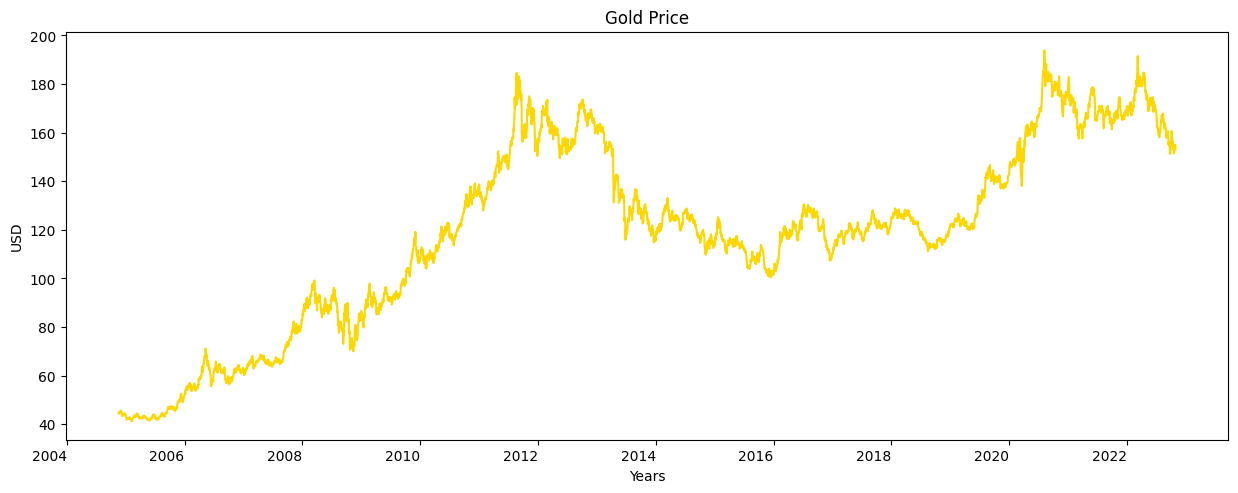

In [96]:
plt.figure(figsize=(15, 6))
Data_frame_closed_price_2D['Close'].plot(color = "gold", xlabel = "Years", ylabel = "USD", 
                         title="Gold Price")
plt.xticks(rotation='horizontal')
plt.show()


In [68]:
# Checking dates
print(Data_frame_closed_price_2D.index)

print("###############################################")
print("First date in data frame",Data_frame_closed_price_2D.index[0])
print("End date in data frame",Data_frame_closed_price_2D.index[-1])
print("###############################################")

DatetimeIndex(['2004-11-18', '2004-11-19', '2004-11-22', '2004-11-23',
               '2004-11-24', '2004-11-26', '2004-11-29', '2004-11-30',
               '2004-12-01', '2004-12-02',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=4518, freq=None)
###############################################
First date in data frame 2004-11-18 00:00:00
End date in data frame 2022-10-28 00:00:00
###############################################


### How to extract day, month and year?

In [73]:
Data_frame_closed_price = Data_frame_closed_price_2D.copy()
Data_frame_closed_price['Month'], Data_frame_closed_price['Year'] = Data_frame.index.month, Data_frame.index.year
Data_frame_closed_price['Day'] =  Data_frame.index.day
print(Data_frame_closed_price.head())

                Close  Month  Year  Day
Date                                   
2004-11-18  44.380001     11  2004   18
2004-11-19  44.779999     11  2004   19
2004-11-22  44.950001     11  2004   22
2004-11-23  44.750000     11  2004   23
2004-11-24  45.049999     11  2004   24


In [74]:
Data_frame_closed_price['Year'][0] == 2004

True

In [75]:
print("Checking Number of data samples for each year")
Data_frame_closed_price['Year'].value_counts()

Checking Number of data samples for each year


2020    253
2008    253
2021    252
2019    252
2016    252
2015    252
2014    252
2005    252
2013    252
2011    252
2010    252
2009    252
2007    251
2017    251
2018    251
2006    251
2012    250
2022    208
2004     30
Name: Year, dtype: int64

In [76]:
index_list = []
New_Data_frame = pd.DataFrame()    # create new empty data frame
for index in range(Data_frame_closed_price.shape[0]):
  if Data_frame_closed_price['Year'][index] == 2004:
    if Data_frame_closed_price['Month'][index] == 11 or Data_frame_closed_price['Month'][index] == 12:
      index_list.append(index)
      New_Data_frame = New_Data_frame.append(Data_frame_closed_price.iloc[index,:])


New_Data_frame

,Close,Month,Year,Day
2004-11-18,44.380001,11.0,2004.0,18.0
2004-11-19,44.779999,11.0,2004.0,19.0
2004-11-22,44.950001,11.0,2004.0,22.0
2004-11-23,44.750000,11.0,2004.0,23.0
2004-11-24,45.049999,11.0,2004.0,24.0
2004-11-26,45.290001,11.0,2004.0,26.0
2004-11-29,45.400002,11.0,2004.0,29.0
2004-11-30,45.119999,11.0,2004.0,30.0
2004-12-01,45.380001,12.0,2004.0,1.0
2004-12-02,44.950001,12.0,2004.0,2.0


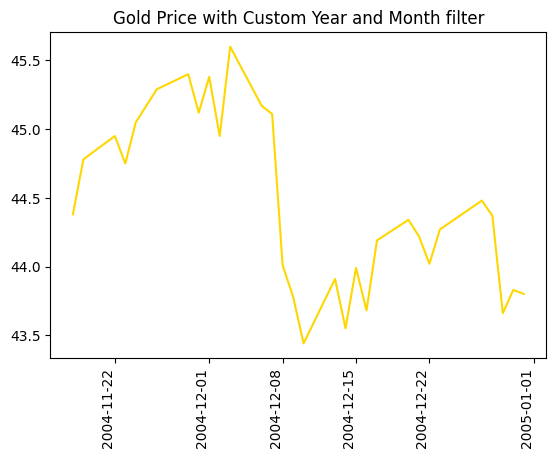

In [77]:
New_Data_frame["Close"].plot(color = "gold" , title = "Gold Price with Custom Year and Month filter")
plt.xticks(rotation = "vertical")
plt.show()

## Missing Data Handelling

In [78]:
Data_frame_closed_price.isnull().sum()

Close    0
Month    0
Year     0
Day      0
dtype: int64

In [79]:
Data_frame_closed_price.shape

(4518, 4)

In [80]:
# if we have nan value, we can drop like this (in this case, we do not have nan value)
Data_frame_closed_price= Data_frame_closed_price.dropna() 

## Preparing Data for model training

Since there is only one column that we can use for training, we have to create our own columns.

In [81]:
Data_frame_for_model = Data_frame_closed_price.copy()
Data_frame_for_model['fake_data_3'] = Data_frame_for_model['Close'].rolling(window=3).mean()
Data_frame_for_model['fake_data_9'] = Data_frame_for_model['Close'].rolling(window=9).mean()
Data_frame_for_model['fake_data_21'] = Data_frame_for_model['Close'].rolling(window=21).mean()
Data_frame_for_model['Next_day_price'] = Data_frame_for_model['Close'].shift(-1)

Data_frame_for_model[:15]

,Close,Month,Year,Day,fake_data_3,fake_data_9,fake_data_21,Next_day_price
Date,,,,,,,,
2004-11-18,44.380001,11,2004,18,NaN,NaN,NaN,44.779999
2004-11-19,44.779999,11,2004,19,NaN,NaN,NaN,44.950001
2004-11-22,44.950001,11,2004,22,44.703334,NaN,NaN,44.750000
2004-11-23,44.750000,11,2004,23,44.826667,NaN,NaN,45.049999
2004-11-24,45.049999,11,2004,24,44.916667,NaN,NaN,45.290001
2004-11-26,45.290001,11,2004,26,45.030000,NaN,NaN,45.400002
2004-11-29,45.400002,11,2004,29,45.246667,NaN,NaN,45.119999
2004-11-30,45.119999,11,2004,30,45.270000,NaN,NaN,45.380001
2004-12-01,45.380001,12,2004,1,45.300001,45.011111,NaN,44.950001


We cannot use nan values in training.

In [82]:
Data_frame_for_model = Data_frame_for_model.dropna() 
Data_frame_for_model.head()

,Close,Month,Year,Day,fake_data_3,fake_data_9,fake_data_21,Next_day_price
Date,,,,,,,,
2004-12-17,44.189999,12,2004,17,43.953334,43.962222,44.594286,44.340000
2004-12-20,44.340000,12,2004,20,44.070000,43.876666,44.592381,44.220001
2004-12-21,44.220001,12,2004,21,44.250000,43.900000,44.565714,44.020000
2004-12-22,44.020000,12,2004,22,44.193334,43.926667,44.521428,44.270000
2004-12-23,44.270000,12,2004,23,44.170001,44.018889,44.498571,44.480000


In [83]:
X_data = Data_frame_for_model[["fake_data_3", "fake_data_9", "fake_data_21"]]
y_data = Data_frame_for_model['Next_day_price']

In [84]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)  
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (3597, 3) 
Shape of y train: (3597,)
Shape of X val: (900, 3) 
Shape of y val:(900,)


In [85]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("R2Score for Training", linear_reg.score(X_train, y_train))

y_pred = linear_reg.predict(X_val)

print("R2Score for testing", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred))

R2Score for Training 0.9980717125451783
R2Score for testing 0.9980400569682023
MAE: 1.1611727987473295
MSE: 2.78609338499313


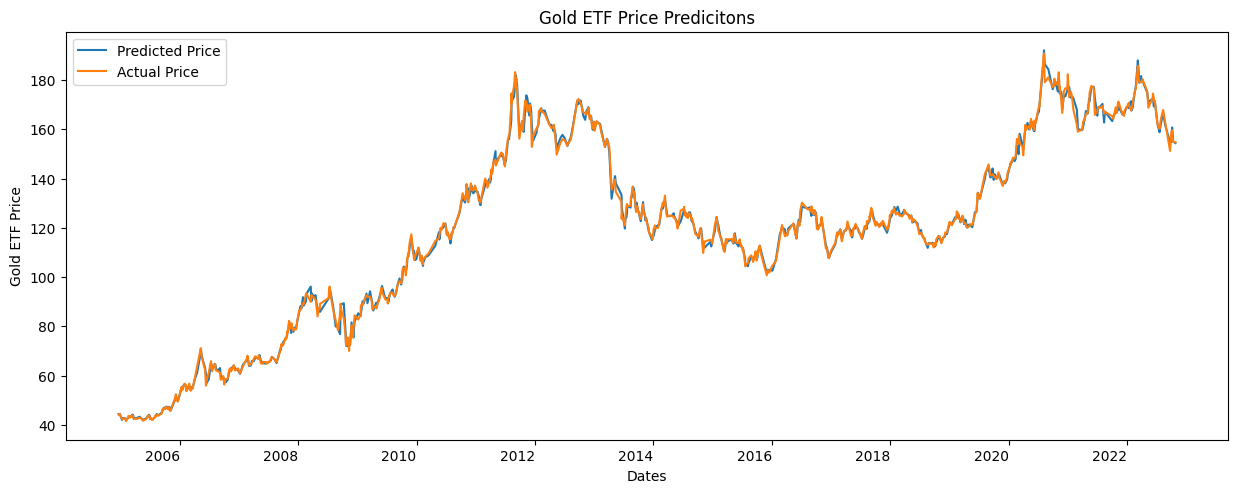

In [86]:
# Predicting the Gold ETF prices
y_pred_df = pd.DataFrame(y_pred, index = y_val.index, columns=['Predicted Price'])

y_pred_df.plot(figsize=(15, 6))
y_val.plot(label = "Actual Price")

plt.legend()
plt.title("Gold ETF Price Predicitons")
plt.ylabel("Gold ETF Price")
plt.xlabel("Dates")
plt.xticks(rotation = "horizontal")
plt.show()

## Model Evaluation with test data frame

In [87]:
# import datetime and get today's date
current_date = datetime.datetime.now()
print("Current Date:", current_date)

data = yf.download('GLD', '2022-10-01', current_date, auto_adjust=True)
print(data[-5:])
print("Shape of test data frame", data.shape)

data['fake_data_3'] = data['Close'].rolling(window=3).mean()
data['fake_data_9'] = data['Close'].rolling(window=9).mean()
data['fake_data_21'] = data['Close'].rolling(window=21).mean()
data = data.dropna()

Current Date: 2023-05-20 04:17:03.762145
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Volume
Date                                                               
2023-05-15  187.300003  187.880005  187.029999  187.210007  5518100
2023-05-16  186.580002  186.820007  184.460007  184.869995  9519500
2023-05-17  184.309998  184.449997  183.479996  184.229996  7474300
2023-05-18  182.100006  182.279999  181.339996  181.839996  8812600
2023-05-19  182.250000  184.339996  181.809998  183.639999  8432300
Shape of test data frame (159, 5)


In [88]:
# Forecast the price
X_test = data[['fake_data_3', 'fake_data_9', 'fake_data_21']]
data['Predicted_gold_price'] = linear_reg.predict(X_test)

In [89]:
data["Predicted_gold_price"].tail()

Date
2023-05-15    186.689460
2023-05-16    185.900366
2023-05-17    185.032645
2023-05-18    183.038409
2023-05-19    182.650140
Name: Predicted_gold_price, dtype: float64

In [90]:
data["Predicted_gold_price"].shift(1).tail()

Date
2023-05-15    187.291562
2023-05-16    186.689460
2023-05-17    185.900366
2023-05-18    185.032645
2023-05-19    183.038409
Name: Predicted_gold_price, dtype: float64

In [91]:
data['Signal'] = np.where(data["Predicted_gold_price"].shift(1) > data["Close"],"Buy","No Position")

data.tail(1)[['Signal','Predicted_gold_price']].T

Date,2023-05-19
Signal,No Position
Predicted_gold_price,182.65014


In [92]:
y_test = data["Close"]
y_pred = data["Predicted_gold_price"]
print("R2Score for testing", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2Score for testing 0.9829929116176358
MAE: 0.95466515947812
MSE: 1.5183331252602508


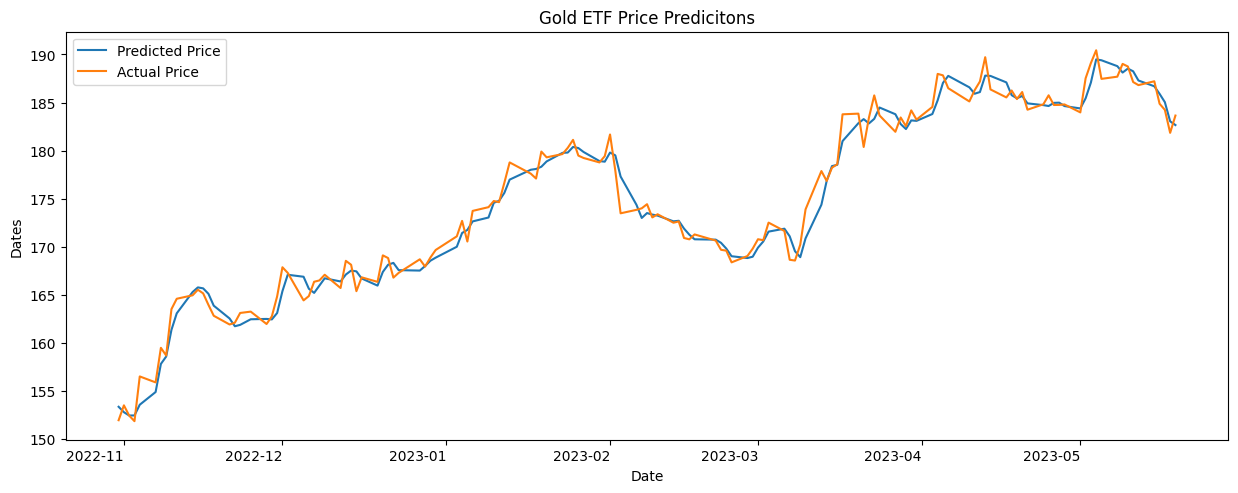

In [93]:
# Predicting the Gold ETF prices
y_pred.plot(label = "Predicted Price", figsize=(15, 6))
y_test.plot(label = "Actual Price")

plt.legend()
plt.title("Gold ETF Price Predicitons")
plt.ylabel("Gold ETF Price")
plt.ylabel("Dates")
plt.xticks(rotation = "horizontal")
plt.show()

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-08-30  273.899994  273.899994  273.899994  273.899994  273.899994       0
2000-08-31  274.799988  278.299988  274.799988  278.299988  278.299988       0
2000-09-01  277.000000  277.000000  277.000000  277.000000  277.000000       0
2000-09-05  275.799988  275.799988  275.799988  275.799988  275.799988       2
2000-09-06  274.200012  274.200012  274.200012  274.200012  274.200012       0


<Axes: title={'center': 'GOLD PRICE HISTORY'}, xlabel='Date', ylabel='USD'>

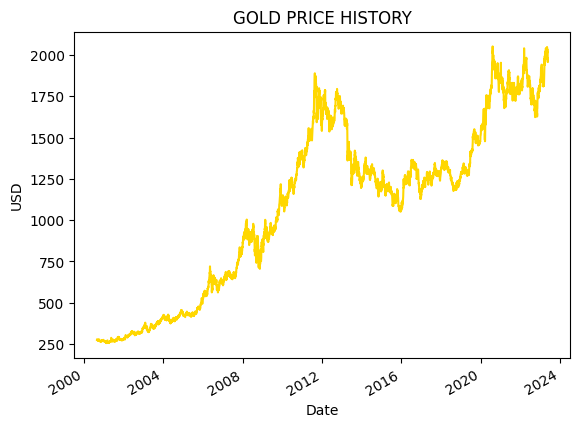

In [94]:
gold_price = yf.download("GC=F")
print(gold_price.head())
gold_price["Close"].plot(color = "GOLD", title = "GOLD PRICE HISTORY", ylabel = "USD")